In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
import pandas as pd 

#create the dataframe with feature data
df = pd.DataFrame(data =iris.data, columns=iris.feature_names)

#add the target column 
df['target'] = iris.target

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df = df[df['target']!=0][['sepal length (cm)','petal length (cm)','target']]

In [15]:
df.head()

,sepal length (cm),petal length (cm),target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt 

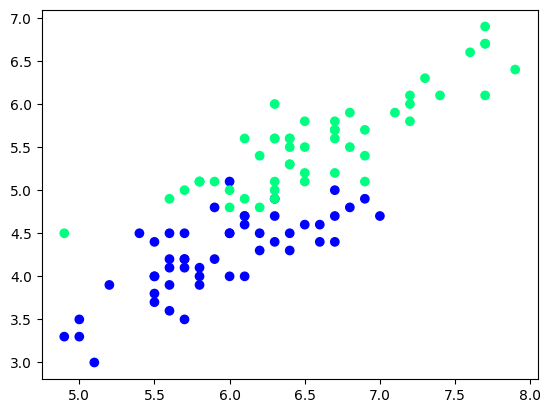

In [18]:
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c=df['target'],cmap='winter')

In [20]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal length (cm),petal length (cm),target
92,5.8,4.0,1
93,5.0,3.3,1
88,5.6,4.1,1
95,5.7,4.2,1
87,6.3,4.4,1
109,7.2,6.1,2
79,5.7,3.5,1
98,5.1,3.0,1
100,6.3,6.0,2
60,5.0,3.5,1


In [21]:
df_val = df.iloc[60:80,:].sample(5)
df_test= df.iloc[80:,:].sample(5)

In [22]:
df_val

,sepal length (cm),petal length (cm),target
128,6.4,5.6,2
120,6.9,5.7,2
127,6.1,4.9,2
117,7.7,6.7,2
118,7.7,6.9,2


In [23]:
df_test

,sepal length (cm),petal length (cm),target
137,6.4,5.5,2
142,5.8,5.1,2
140,6.7,5.6,2
131,7.9,6.4,2
148,6.2,5.4,2


In [35]:
X_test = df_val.iloc[:,:2].values
y_test = df_val.iloc[:,-1].values

In [36]:
X_test

array([[6.4, 5.6],
       [6.9, 5.7],
       [6.1, 4.9],
       [7.7, 6.7],
       [7.7, 6.9]])

In [37]:
y_test

array([2, 2, 2, 2, 2])

In [38]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal length (cm),petal length (cm),target
92,5.8,4.0,1
109,7.2,6.1,2
98,5.1,3.0,1
87,6.3,4.4,1
87,6.3,4.4,1
93,5.0,3.3,1
109,7.2,6.1,2
93,5.0,3.3,1


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [41]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

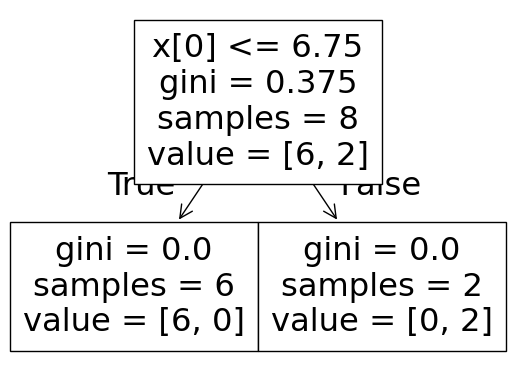

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


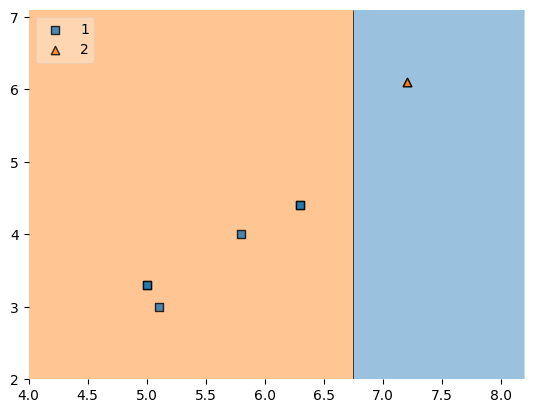

In [42]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

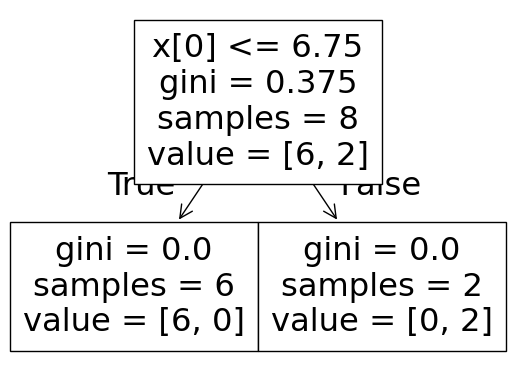

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


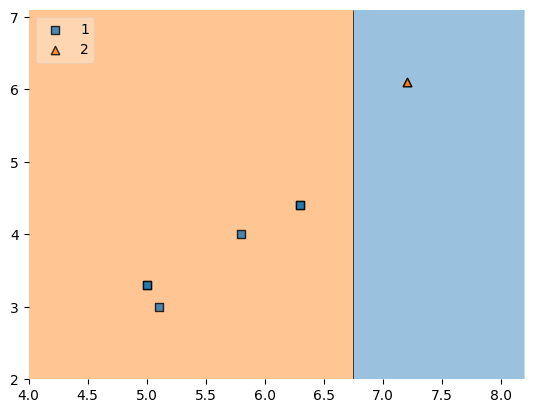

In [43]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [44]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal length (cm),petal length (cm),target
88,5.6,4.1,1
92,5.8,4.0,1
87,6.3,4.4,1
109,7.2,6.1,2
87,6.3,4.4,1
100,6.3,6.0,2
79,5.7,3.5,1
109,7.2,6.1,2


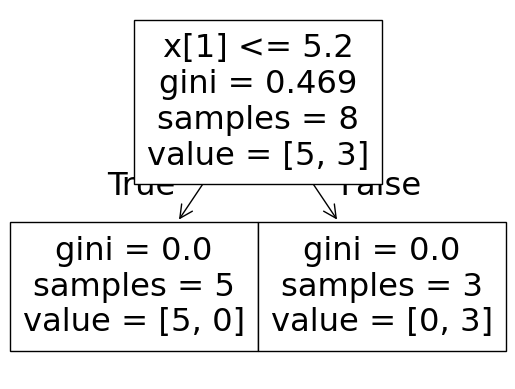

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


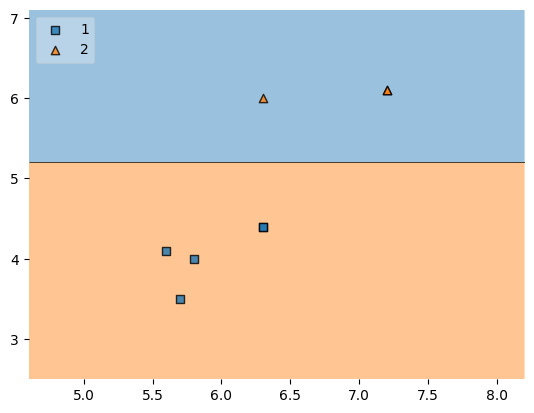

In [45]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

predict

In [48]:
df_test
import numpy as np

In [49]:
print("Predictor 1",dt_bag1.predict(np.array([6.4,5.5]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([6.4,5.5]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([6.4,5.5]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting

In [50]:
# Row sampling without replacement
df_train

,sepal length (cm),petal length (cm),target
92,5.8,4.0,1
93,5.0,3.3,1
88,5.6,4.1,1
95,5.7,4.2,1
87,6.3,4.4,1
109,7.2,6.1,2
79,5.7,3.5,1
98,5.1,3.0,1
100,6.3,6.0,2
60,5.0,3.5,1


In [51]:
df_train.sample(8)

,sepal length (cm),petal length (cm),target
92,5.8,4.0,1
98,5.1,3.0,1
79,5.7,3.5,1
100,6.3,6.0,2
60,5.0,3.5,1
88,5.6,4.1,1
109,7.2,6.1,2
87,6.3,4.4,1


In [52]:
#random subspaces : you do column sampling , with replacement or without replacemnt 

In [53]:
#random pathces : if you want to do raw sampling as well as column sampling 